In [1]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.request import urlopen

# Zad
Zczytaj z wikipedi artykuły o tytułach 
```python
["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]
```
i zapisz w tablicy zawartości tych podstron ($id="bodyContent"$)

In [2]:
wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]



In [3]:
def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x).find("div",id="bodyContent").find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]

articles[0][:200]

'<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that ar'

In [4]:
import re
articles = [re.sub("<.+?>"," ",a) for a in articles] # ew (str(a))

In [5]:
articles[0]

' In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integration is one of the two main operations of  calculus ; its inverse operation,  differentiation , is the other. Given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral  of  f  over  x  from  a  to  b , that is:  [1]    [2]  \n   can be interpreted informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . The area above the  x -axis adds to the total, and that below the  x -axis subtracts from the total.\n   The operation of integration, up to an additive constant, is the inverse of the operation of differentiation. For this reason, the term  integral  may also refer to the related notion of the  antiderivative , a function  F 

In [6]:
articles[1]

' In the branch of  mathematics  known as  real analysis , the  Riemann integral , created by  Bernhard Riemann , was the first rigorous definition of the  integral  of a  function  on an  interval .  It was presented to the faculty at the  University of Göttingen  in 1854, but not published in a journal until 1868.  [1]   For many functions and practical applications, the Riemann integral can be evaluated by the  fundamental theorem of calculus  or approximated by  numerical integration .\n   The Riemann integral is unsuitable for many theoretical purposes. Some of the technical deficiencies in Riemann integration can be remedied with the  Riemann–Stieltjes integral , and most disappear with the  Lebesgue integral , though the latter does not have a satisfactory treatment of  improper integrals .  The  gauge integral  is a generalisation of the Lebesgue integral that is at once closer to the Riemann integral.   \nThese more general theories allow for the integration of more "jagged" o

# Zad.

Proszę wykonać podstawową tekenizację biorąc pod uwagę:

 * bierzemy kolejne artykuły i dzieli go na tokeny
 * bierzemy listę tokenów i usuwamy punktory
 * bierzemy listę tokenów i usuwa liczby
 * bierzemy listę tokenów i zamieniamy na małe litery


In [7]:
from nltk.tokenize import word_tokenize
import string

def doc2sen(docs):
    return  sent_tokenize(docs)

def sen2token(sentence):
    return word_tokenize(sentence)

def remove_punctuation(words):
    remove_list = string.punctuation
    return [w for w in words if not w in set(remove_list)]

def remove_nummbers(words):
    return [w for w in words if not w.isdigit()]

def to_lower(words):
    return [w.lower() for w in words]

def preprocessing_doc(words):
    words = sen2token(words)
    words = remove_punctuation(words)
    words = remove_nummbers(words)
    words = to_lower(words)
    return words

def preprocessing_text(corpus):
    return [preprocessing_doc(doc) for doc in corpus]



In [8]:
texts_all = preprocessing_text(articles)

# Zad

Wyznacz liczności słów oraz narysuj wykres ich liczności dla 20 najczęstszych słów w pierwszym tekście.

In [9]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [10]:
text_1 =texts_all[0]
fdist1 = FreqDist(text_1)

print(fdist1.most_common(20))

[('the', 618), ('of', 354), ('a', 308), ('is', 184), ('to', 165), ('and', 150), ('in', 140), ('integral', 135), ('x', 98), ('function', 87), ('for', 87), ('be', 81), ('an', 80), ('f', 75), ('that', 72), ('by', 67), ('as', 60), ('integrals', 60), ('this', 59), ('on', 57)]


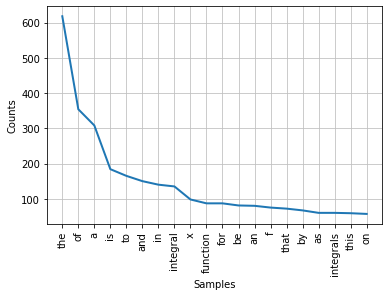

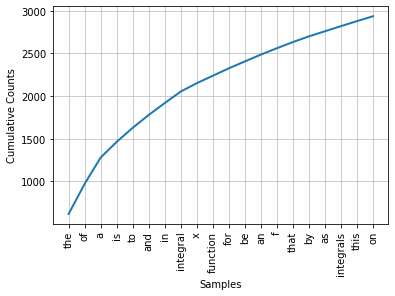

In [11]:
fdist1.plot(20, cumulative=False)
fdist1.plot(20, cumulative=True)

# Zad

Proszę usunąć 
    
    * stopwords.words('english') 
    * string.punctuation
    
Następnie proszę wyznaczyć liczności słów oraz narysuj wykres ich liczności dla 20 najczęstszych słów w pierwszym tekście.

In [18]:
from nltk.corpus import stopwords

# redundant_tokens = stopwords.words('english') + list(string.punctuation)
redundant_tokens = stopwords.words('english') + list(string.punctuation) + ['--', '."', 'would', '!"', '?"', ',"', '...', '..', 'u', "'s", '....', "n't", "'m", "''"]


filtered_text1 = [w for w in text_1 if not w in set(redundant_tokens)]

filtered_text1

['mathematics',
 'integral',
 'assigns',
 'numbers',
 'functions',
 'way',
 'describe',
 'displacement',
 'area',
 'volume',
 'concepts',
 'arise',
 'combining',
 'infinitesimal',
 'data',
 'integration',
 'one',
 'two',
 'main',
 'operations',
 'calculus',
 'inverse',
 'operation',
 'differentiation',
 'given',
 'function',
 'f',
 'real',
 'variable',
 'x',
 'interval',
 'b',
 'real',
 'line',
 'definite',
 'integral',
 'f',
 'x',
 'b',
 'interpreted',
 'informally',
 'signed',
 'area',
 'region',
 'xy',
 '-plane',
 'bounded',
 'graph',
 'f',
 'x',
 '-axis',
 'vertical',
 'lines',
 'x',
 'x',
 'b',
 'area',
 'x',
 '-axis',
 'adds',
 'total',
 'x',
 '-axis',
 'subtracts',
 'total',
 'operation',
 'integration',
 'additive',
 'constant',
 'inverse',
 'operation',
 'differentiation',
 'reason',
 'term',
 'integral',
 'may',
 'also',
 'refer',
 'related',
 'notion',
 'antiderivative',
 'function',
 'f',
 'whose',
 'derivative',
 'given',
 'function',
 'f',
 'case',
 'called',
 'indefinite

# Zad 


Prosze wykonać stemowanie np. 
```python
from nltk.stem import PorterStemmer
```

Następnie proszę wyznaczyć liczności słów oraz narysuj wykres ich liczności dla 20 najczęstszych słów w pierwszym tekście.

[('integral', 135), ('x', 98), ('function', 87), ('f', 75), ('integrals', 60), ('b', 55), ('integration', 48), ('functions', 43), ('interval', 33), ('\\displaystyle', 32), ('calculus', 30), ('riemann', 29), ('area', 28), ('used', 25), ('one', 24), ('sum', 23), ('``', 23), ('values', 23), ('vector', 21), ('may', 19), ('defined', 19), ('surface', 19), ('first', 18), ('method', 18), ('volume', 17), ('given', 17), ('theorem', 17), ('lebesgue', 17), ('example', 17), ('line', 16), ('antiderivative', 16), ('called', 16), ('using', 16), ('differential', 16), ('many', 16), ('value', 16), ('field', 16), ('variable', 15), ('definite', 15), ('closed', 15), ('−', 15), ('real', 14), ('space', 14), ('dx', 14), ('integrated', 14), ('also', 13), ('find', 13), ('k', 13), ('approximation', 13), ('leibniz', 12)]


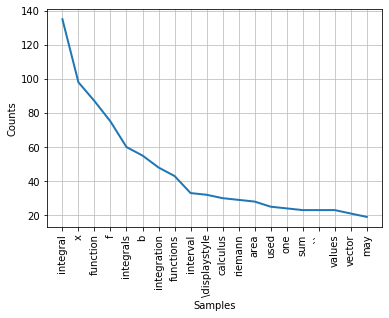

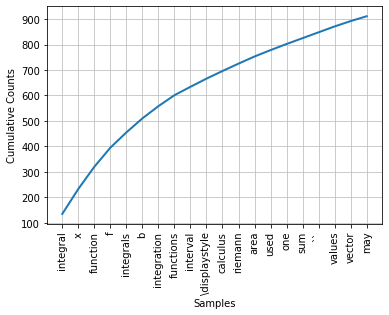

In [19]:
fdist2 = FreqDist(filtered_text1)

print(fdist2.most_common(50))
fdist2.plot(20, cumulative=False)
fdist2.plot(20, cumulative=True)


# Zad

Porównaj wyniki z lematyzacją np.
```python
    from nltk.stem import WordNetLemmatizer
```

Następnie proszę wyznaczyć liczności słów oraz narysuj wykres ich liczności dla 20 najczęstszych słów w pierwszym tekście.

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
stemmer = nltk.PorterStemmer()
filtered_stemm_text1 = [stemmer.stem(w) for w in filtered_text1] 
filtered_stemm_text1

stemmer = WordNetLemmatizer()
filtered_stemm_text1 = [stemmer.lemmatize(w) for w in filtered_stemm_text1] 
filtered_stemm_text1

['mathemat',
 'integr',
 'assign',
 'number',
 'function',
 'way',
 'describ',
 'displac',
 'area',
 'volum',
 'concept',
 'aris',
 'combin',
 'infinitesim',
 'data',
 'integr',
 'one',
 'two',
 'main',
 'oper',
 'calculu',
 'invers',
 'oper',
 'differenti',
 'given',
 'function',
 'f',
 'real',
 'variabl',
 'x',
 'interv',
 'b',
 'real',
 'line',
 'definit',
 'integr',
 'f',
 'x',
 'b',
 'interpret',
 'inform',
 'sign',
 'area',
 'region',
 'xy',
 '-plane',
 'bound',
 'graph',
 'f',
 'x',
 '-axi',
 'vertic',
 'line',
 'x',
 'x',
 'b',
 'area',
 'x',
 '-axi',
 'add',
 'total',
 'x',
 '-axi',
 'subtract',
 'total',
 'oper',
 'integr',
 'addit',
 'constant',
 'invers',
 'oper',
 'differenti',
 'reason',
 'term',
 'integr',
 'may',
 'also',
 'refer',
 'relat',
 'notion',
 'antideriv',
 'function',
 'f',
 'whose',
 'deriv',
 'given',
 'function',
 'f',
 'case',
 'call',
 'indefinit',
 'integr',
 'written',
 'integr',
 'discus',
 'articl',
 'term',
 'definit',
 'integr',
 'fundament',
 'the

[('integr', 267), ('function', 132), ('x', 98), ('f', 75), ('b', 55), ('use', 51), ('interv', 39), ('valu', 39), ('sum', 37), ('area', 36), ('\\displaystyl', 32), ('calculu', 30), ('differenti', 30), ('riemann', 29), ('definit', 28), ('approxim', 28), ('comput', 27), ('one', 26), ('antideriv', 25), ('limit', 24), ('``', 23), ('defin', 22), ('surfac', 21), ('method', 21), ('gener', 21), ('vector', 21), ('call', 20), ('volum', 19), ('variabl', 19), ('may', 19), ('theorem', 19), ('exampl', 19), ('line', 18), ('first', 18), ('measur', 18), ('field', 18), ('given', 17), ('curv', 17), ('lebesgu', 17), ('close', 16), ('space', 16), ('mani', 16), ('express', 16), ('case', 15), ('calcul', 15), ('symbol', 15), ('−', 15), ('point', 15), ('real', 14), ('find', 14)]


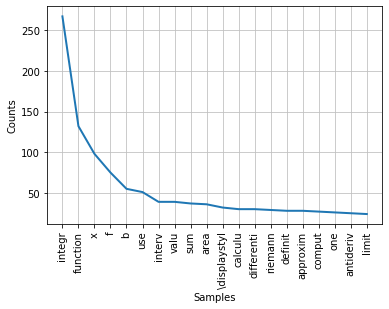

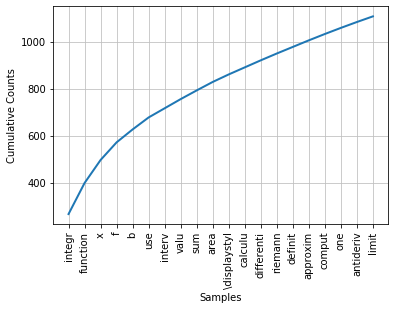

In [27]:
fdist2 = FreqDist(filtered_stemm_text1)

print(fdist2.most_common(50))
fdist2.plot(20, cumulative=False)
fdist2.plot(20, cumulative=True)
